# Data Analysis on Suicide Statistics Dataset 

In this academic masters courswork, we will analyse the data from a dataset which shows suicide statistics


In [1]:
#Import libraries
import pandas as pd
import numpy as np

#Load WHO suicide statistics dataset
suicide = pd.read_csv('dataset/who_suicide_statistics_modifed3.csv')
suicide.head()

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,NaN,"2,156,624,900"


In [2]:
#Functionality A - List all countries in the dataset

#List all countries
suicide['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [3]:
#Functionality B - Describe any problem with the data including missing data, data format etc.

#Show the datatypes for each column
suicide.info()

#Show the first five rows of dataset
suicide.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27840 entries, 0 to 27839
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27840 non-null  object 
 1   year                27840 non-null  int64  
 2   sex                 27840 non-null  object 
 3   age                 27840 non-null  object 
 4   suicides_no         23575 non-null  object 
 5   population          27840 non-null  int64  
 6   HDI for year        8368 non-null   float64
 7    gdp_for_year ($)   27840 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ MB


,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,NaN,"2,156,624,900"


### Problems seen with the dataset: 
- 'suicides_no' and 'gdp_for_year' need to be changed to int64. 'age' does not because it is a grouping, not just a integer. 
- Headers for the table need to be formatted the same.
- 'suicides_no' and 'HDI for year' has missing data as the non-null count does not reach to 27840. 

In [4]:
#Functionality C - Clean and transform the data into the correct data types

#Remove any white space before the column names
suicide.columns=suicide.columns.str.strip()

#Rename columns so they're formatted the same
header={'HDI for year':'hdi_for_year',
        'gdp_for_year ($)': 'gdp_for_year'}
suicide.rename(columns=header,
              inplace=True)

#Remove commas in 'gdp_per_year'
suicide['gdp_for_year'] = suicide['gdp_for_year'].str.replace(
    pat=',',
    repl='',
    regex=False)

#Fill missing data with '0'
suicide.fillna(0, inplace=True)

#Convert data types
suicide['gdp_for_year'] = suicide['gdp_for_year'].apply('int64')
suicide['suicides_no'] = pd.to_numeric(suicide['suicides_no'], errors = 'coerce', downcast = 'integer')
suicide['year'] = pd.to_datetime(suicide['year'], format='%Y').dt.year


#Show changes
suicide.info()
suicide.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27840 entries, 0 to 27839
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       27840 non-null  object 
 1   year          27840 non-null  int64  
 2   sex           27840 non-null  object 
 3   age           27840 non-null  object 
 4   suicides_no   27820 non-null  float64
 5   population    27840 non-null  int64  
 6   hdi_for_year  27840 non-null  float64
 7   gdp_for_year  27840 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ MB


,country,year,sex,age,suicides_no,population,hdi_for_year,gdp_for_year
0,Albania,1987,male,15-24 years,21.0,312900,0.0,2156624900
1,Albania,1987,male,35-54 years,16.0,308000,0.0,2156624900
2,Albania,1987,female,15-24 years,14.0,289700,0.0,2156624900
3,Albania,1987,male,75+ years,1.0,21800,0.0,2156624900
4,Albania,1987,male,25-34 years,9.0,274300,0.0,2156624900


In [5]:
#Functionaility D - Make a new column titled 'suicides/100k'
suicide['suicides/100k'] = (suicide['suicides_no'] / (suicide['population'] / 100000))

#Show changes
suicide.head()

,country,year,sex,age,suicides_no,population,hdi_for_year,gdp_for_year,suicides/100k
0,Albania,1987,male,15-24 years,21.0,312900,0.0,2156624900,6.711409
1,Albania,1987,male,35-54 years,16.0,308000,0.0,2156624900,5.194805
2,Albania,1987,female,15-24 years,14.0,289700,0.0,2156624900,4.832585
3,Albania,1987,male,75+ years,1.0,21800,0.0,2156624900,4.587156
4,Albania,1987,male,25-34 years,9.0,274300,0.0,2156624900,3.281079


In [6]:
#Functionaility E - Make a new column titled 'generation'

#Make a temporary column 'birth_year' which will correspond to the generation criteria
suicide['birth_year'] = suicide['year'] - pd.to_numeric(suicide['age'].astype(str).str[:2], errors='coerce')

#Creates the criteria for each generation
criteria = [(suicide['birth_year'].between(1883, 1900)),
            (suicide['birth_year'].between(1901, 1927)),
            (suicide['birth_year'].between(1928, 1945)),
            (suicide['birth_year'].between(1946, 1964)),
            (suicide['birth_year'].between(1965, 1980)),
            (suicide['birth_year'].between(1981, 1995)),
            (suicide['birth_year'].between(1996, 2010)),
            (suicide['birth_year'].between(2011, 2025))]

#Creates the labels to the criteria
labels = ['Lost Generation', 
          'G.I. Generation', 
          'Silent',
          'Boomers', 
          'Generation X', 
          'Millennials', 
          'Generation Z', 
          'Generation A']

#The use of np.select assigns the labels to the criteria
suicide['generation'] = np.select(criteria, labels, default='Unknown')

#Drop the temporary 'birth_year' column
suicide.drop(columns=['birth_year'], inplace=True)
            
#Show changes
suicide.head()
            

,country,year,sex,age,suicides_no,population,hdi_for_year,gdp_for_year,suicides/100k,generation
0,Albania,1987,male,15-24 years,21.0,312900,0.0,2156624900,6.711409,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,0.0,2156624900,5.194805,Boomers
2,Albania,1987,female,15-24 years,14.0,289700,0.0,2156624900,4.832585,Generation X
3,Albania,1987,male,75+ years,1.0,21800,0.0,2156624900,4.587156,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,0.0,2156624900,3.281079,Boomers


In [7]:
#Functionality F - Make a new column titled 'gdp_per_capita'
suicide['gdp_per_capita'] = suicide['gdp_for_year'] / suicide['population']

#Show changes
suicide.head()

,country,year,sex,age,suicides_no,population,hdi_for_year,gdp_for_year,suicides/100k,generation,gdp_per_capita
0,Albania,1987,male,15-24 years,21.0,312900,0.0,2156624900,6.711409,Generation X,6892.377437
1,Albania,1987,male,35-54 years,16.0,308000,0.0,2156624900,5.194805,Boomers,7002.028896
2,Albania,1987,female,15-24 years,14.0,289700,0.0,2156624900,4.832585,Generation X,7444.338626
3,Albania,1987,male,75+ years,1.0,21800,0.0,2156624900,4.587156,G.I. Generation,98927.747706
4,Albania,1987,male,25-34 years,9.0,274300,0.0,2156624900,3.281079,Boomers,7862.285454


In [8]:
#Functionality G - Rank countries by total suicides
#Group countries and the sum of 'suicides_no'
country_suicides = suicide.groupby('country')['suicides_no'].sum()

#Rank the result in descending order'
ranked_suicides = country_suicides.sort_values(ascending=False)

#Display result
print(ranked_suicides)

country
Russian Federation       815965.0
United States            759837.0
Japan                    635785.0
France                   240432.0
Ukraine                  238061.0
                           ...   
Maldives                     20.0
Antigua and Barbuda          11.0
San Marino                    4.0
Saint Kitts and Nevis         0.0
Dominica                      0.0
Name: suicides_no, Length: 101, dtype: float64


In [9]:
#Fuctionality H - Given a country name, find a year that had highest number of suicides
#User inputs a country
input_country = input("Enter the country name: ")

#Filter dataset to the input country
country_data = suicide[suicide['country'] == input_country]

#Check if data exists
if country_data.empty:
    print(f"No data found for {input_country}")
else:
    # Find the year with the highest number of suicides
    max_suicides_year = country_data.loc[country_data['suicides_no'].idxmax(), 'year']
    print(f"The year with the highest number of suicides in {input_country} is {max_suicides_year}")


Enter the country name: Japan
The year with the highest number of suicides in Japan is 2003


In [10]:
#Fuctionality I - Given a year and country name, calculate the number of suicides by gender
#Input a year and country name
input_year = int(input("Enter the year: "))
input_country = input("Enter the country name: ")

#Filter dataset for inputted year and country
year_country_data = suicide[(suicide['year'] == input_year) & (suicide['country'] == input_country)]

#Check if data exists
if year_country_data.empty:
    print(f"No data found for {input_country} in the year {input_year}")
else:
    # Group by 'gender' and calculate the sum of suicides for each gender
    suicides_by_gender = year_country_data.groupby('sex')['suicides_no'].sum()
     # Display the result
    print(f"Suicides by gender in {input_country} for the year {input_year}:\n{suicides_by_gender}")

Enter the year: 2012
Enter the country name: Japan
Suicides by gender in Japan for the year 2012:
sex
female     7918.0
male      18402.0
Name: suicides_no, dtype: float64


In [11]:
#Functionality J - Find total suicides by continent 

#Found an online dataset which has the country and continent 
#Import this new dataset
continents = pd.read_csv('dataset/countries_continents.csv')

#Merge this new dataset with our existing one
suicide_with_continent = pd.merge(suicide, continents, on='country', how='left')

#Group by continent and calculate the sum of suicides in each
suicides_by_continent = suicide_with_continent.groupby('continent')['suicides_no'].sum()

print(suicides_by_continent)

continent
Africa             10047.0
Asia             1775838.0
Europe           1691013.0
North America     237075.0
Oceania            72379.0
South America     353165.0
Name: suicides_no, dtype: float64


In [12]:
#Functionality K - Find correlations between suicides, GDP per capita and population.
#Calculate the correlation matrix
correlation = suicide[['suicides_no', 'gdp_for_year', 'population']].corr()

#Display correlation matrix
print(correlation)

              suicides_no  gdp_for_year  population
suicides_no      1.000000      0.398471    0.546123
gdp_for_year     0.398471      1.000000    0.710676
population       0.546123      0.710676    1.000000


### Observations:
- There are positive correlations between suicides, GDP per capita and population
- Between 'suicides_no' and 'gdp_for_year' - a correlation coefficient of 0.40. Meaning as GDP increases, number of suicides increase
- Between 'suicides_no' and 'population' - a correlation coefficient of 0.55. Meaning as population increases, number of suicides increase
- Between 'gdp_for_year' and 'population' - a correlation coefficient of 0.71. Meaning as GDP increases, population increases. 
- 'gdp_for_year' and 'population' has the strongest positive correlation. 

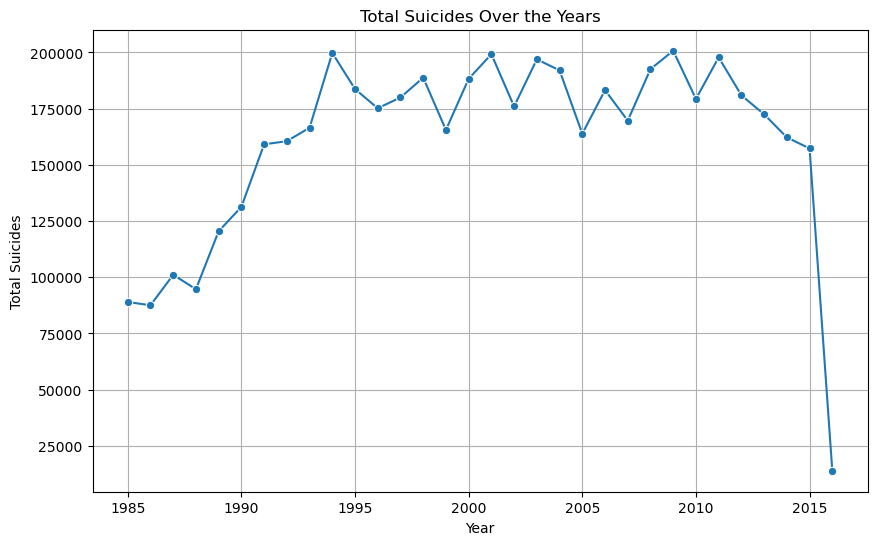

In [14]:
#Functionality L - Use appropriate visual notation to visualise suicides over years
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'year' and calculate the sum of suicides for every year
total_suicides_per_year = suicide.groupby('year')['suicides_no'].sum()

# Make a line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_suicides_per_year.index, y=total_suicides_per_year.values, marker='o')
plt.title('Total Suicides Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.show()

#### Why I used a line graph:
- I used a line graph to visualise the trend over the years to see where total suicides rise and fall.
- It allows a clear and simple way of showing it. If I were to use a bar chart, it wouldn't be as clear due to blocky colours.

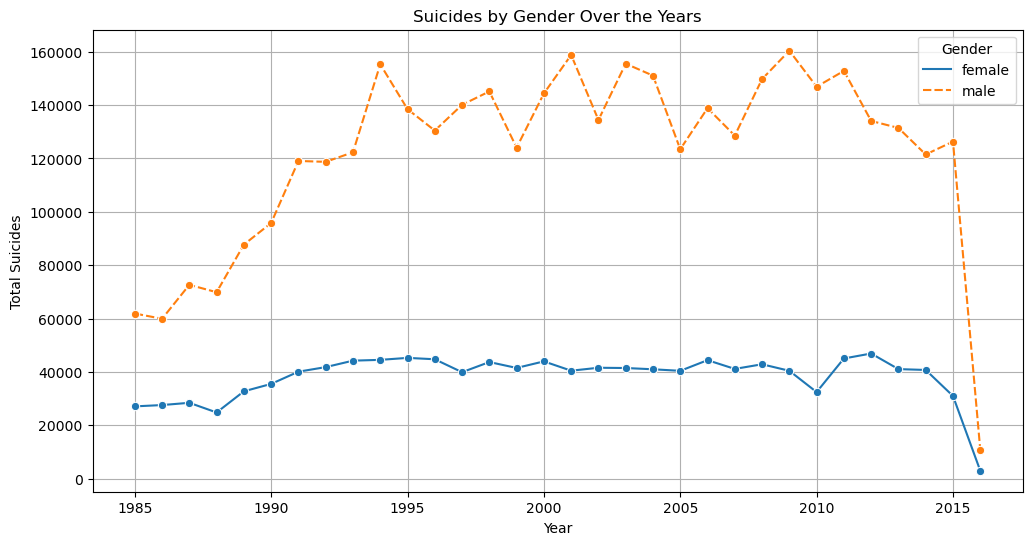

In [15]:
#Functionality M - Compare suicides by gender over years and state conclusions
# Group by 'year' and 'gender' and calculate the sum of suicides for each combination
suicides_by_gender_per_year = suicide.groupby(['year', 'sex'])['suicides_no'].sum().unstack()

# Make a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=suicides_by_gender_per_year, marker='o')
plt.title('Suicides by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

### Observations:
- This graph shows how there are many more suicides committed by males than females.
- The total suicides for males varies up and down over the years (between 1993-2011).
- The total suicides for females keeps a similar number (between 1991-2009).
- However, there seems to be a steep decrease for both in 2016 which I believe could be due to an outlier or because I changed some Null values to 0. 

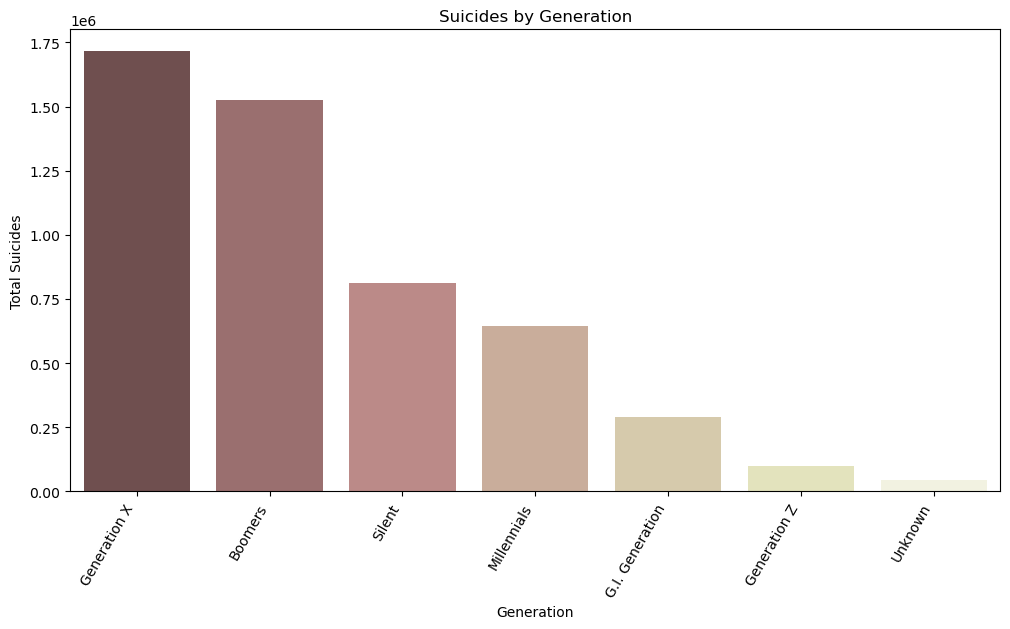

In [16]:
#Functionality N -
# Group by 'generation' and calculate the sum of suicides for each generation
suicides_by_generation = suicide.groupby('generation')['suicides_no'].sum().sort_values(ascending=False)

# Make a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=suicides_by_generation.index, y=suicides_by_generation.values, palette='pink')
plt.title('Suicides by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Suicides')
plt.xticks(rotation=60, ha='right')
plt.show()

### Observations:
- The bar chart shows total suicides for each generation in descending order
- Generation X has the most total suicides
- Generation Z has the least
- However, the Lost Generation does not make an apperance on this chart meaning it could actually have the least (being 0 suicides).
- Or the Lost Generation has no recorded data
- There is also an Unknown column which could be rows that couldn't make the generation data